#                                            Featurization and Model tuning

# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.model_selection  import train_test_split
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve, auc 
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA, IncrementalPCA

%matplotlib inline
sns.set(color_codes=True)

# Import the data

In [2]:
df=pd.read_csv('signal-data.csv')

In [3]:
df.drop('Time',axis=1,inplace= True)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


## EDA

### Exploring the data

In [5]:
print('The size of the data:', df.size)
print('No of rows in the data:', df.shape[0])
print('No of columns in the data:', df.shape[1])

The size of the data: 926097
No of rows in the data: 1567
No of columns in the data: 591


In [6]:
df.dtypes


0            float64
1            float64
2            float64
3            float64
4            float64
5            float64
6            float64
7            float64
8            float64
9            float64
10           float64
11           float64
12           float64
13           float64
14           float64
15           float64
16           float64
17           float64
18           float64
19           float64
20           float64
21           float64
22           float64
23           float64
24           float64
25           float64
26           float64
27           float64
28           float64
29           float64
              ...   
561          float64
562          float64
563          float64
564          float64
565          float64
566          float64
567          float64
568          float64
569          float64
570          float64
571          float64
572          float64
573          float64
574          float64
575          float64
576          float64
577          

### Treating Missing values


In [7]:
df = df.convert_objects(convert_numeric=True)

J:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [8]:
df.isnull().sum()

0              6
1              7
2             14
3             14
4             14
5             14
6             14
7              9
8              2
9              2
10             2
11             2
12             2
13             3
14             3
15             3
16             3
17             3
18             3
19            10
20             0
21             2
22             2
23             2
24             2
25             2
26             2
27             2
28             2
29             2
            ... 
561            1
562          273
563          273
564          273
565          273
566          273
567          273
568          273
569          273
570            0
571            0
572            0
573            0
574            0
575            0
576            0
577            0
578          949
579          949
580          949
581          949
582            1
583            1
584            1
585            1
586            1
587            1
588           

#### It can be noted that the Target variable doesn't have any missing values.

### Filling the missing values with median values

In [9]:
medianFiller = lambda x: x.fillna(x.median())

df = df.apply(medianFiller,axis=0).astype('float64')


In [10]:
df.isnull().sum()

0            0
1            0
2            0
3            0
4            0
5            0
6            0
7            0
8            0
9            0
10           0
11           0
12           0
13           0
14           0
15           0
16           0
17           0
18           0
19           0
20           0
21           0
22           0
23           0
24           0
25           0
26           0
27           0
28           0
29           0
            ..
561          0
562          0
563          0
564          0
565          0
566          0
567          0
568          0
569          0
570          0
571          0
572          0
573          0
574          0
575          0
576          0
577          0
578          0
579          0
580          0
581          0
582          0
583          0
584          0
585          0
586          0
587          0
588          0
589          0
Pass/Fail    0
Length: 591, dtype: int64

In [11]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,72.2889,0.5005,0.0118,0.0035,2.3630,0.0205,0.0148,0.0046,71.9005,-1.0
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1.0
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1.0
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1.0
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,72.2889,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1.0


In [12]:
df.columns[df.isna().any()].tolist()

[]

### Splitting the original data into two parts, the dataset df3 will serve as test data later once the best parameters for the algorithm are found

In [13]:
df3=df.copy(deep=True)
df3=df.iloc[1067:]

In [14]:
print('The size of the Test data:', df3.size)
print('No of rows in the Test data:', df3.shape[0])
print('No of columns in the Test data:', df3.shape[1])

The size of the Test data: 295500
No of rows in the Test data: 500
No of columns in the Test data: 591


In [15]:
df=df.iloc[:1067]

In [16]:
print('The size of the  data:', df.size)
print('No of rows in the  data:', df.shape[0])
print('No of columns in the  data:', df.shape[1])

The size of the  data: 630597
No of rows in the  data: 1067
No of columns in the  data: 591


### Five point summary

In [17]:
five_point=df.describe().T
five_point[['min','25%','50%','75%','max']]

,min,25%,50%,75%,max
0,2743.2400,2966.99000,3009.40000,3055.04000,3266.0400
1,2158.7500,2449.66000,2497.56000,2537.97500,2846.4400
2,2060.6600,2180.55560,2200.06660,2218.05550,2315.2667
3,847.7976,1070.04390,1285.21440,1593.12200,3715.0417
4,0.6815,1.01770,1.31010,1.48870,3.8894
5,100.0000,100.00000,100.00000,100.00000,100.0000
6,83.4233,99.22000,101.86110,104.41560,111.8900
7,0.1160,0.12110,0.12220,0.12380,0.1286
8,1.1910,1.43075,1.47270,1.52640,1.6564
9,-0.0534,-0.01100,-0.00130,0.00840,0.0468


### Correlations
#### There are hundreds of columns and only few have influence over the target variable. Rather than using all the attributes, choosing the ones that have high correlation with the target variable is better because using all attributes can increase the algorithm complexity

In [18]:
correlation_values=df.corr()['Pass/Fail']
correlation_values.abs().sort_values(ascending=False)

Pass/Fail    1.000000
59           0.181251
431          0.130698
21           0.126718
430          0.125470
434          0.123118
435          0.121058
436          0.120830
437          0.114420
103          0.113175
28           0.112612
122          0.109137
298          0.108978
163          0.108714
510          0.107285
165          0.102543
129          0.102341
300          0.100598
114          0.100425
127          0.100034
166          0.099652
249          0.099444
79           0.099255
387          0.099213
164          0.098256
295          0.098203
299          0.097856
337          0.097826
22           0.097018
125          0.096012
               ...   
464               NaN
465               NaN
466               NaN
478               NaN
481               NaN
498               NaN
501               NaN
502               NaN
503               NaN
504               NaN
505               NaN
506               NaN
507               NaN
508               NaN
509       

#### Choosing the attributes that have a correlation value of greater than 0.095

In [19]:
df2=df.copy(deep=True)
df2=df2[['59','103','510','348','431','434','430','21','435','28','436','210','129','298','163','Pass/Fail']]

In [20]:
print('No of rows in the data:', df2.shape[0])
print('No of columns in the data:', df2.shape[1])

No of rows in the data: 1067
No of columns in the data: 16


<AxesSubplot:title={'center':'Correlation of Attributes'}>

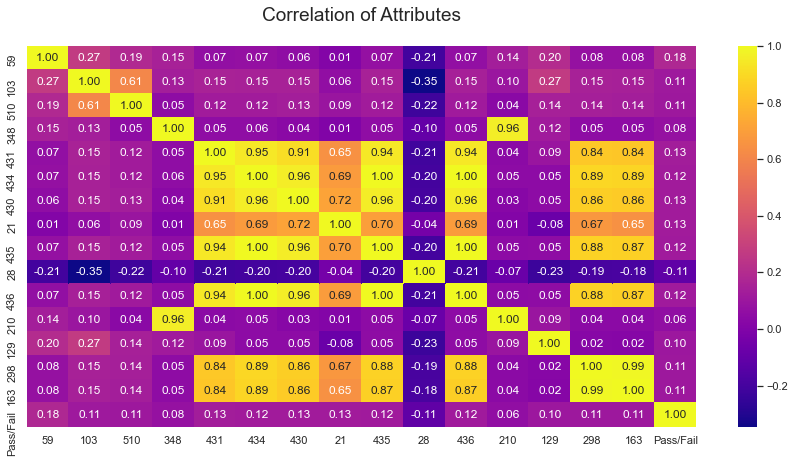

In [21]:
plt.figure(figsize = (15,7))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(df2.corr(), cmap='plasma',annot=True, fmt='.2f')

### Data Visualization

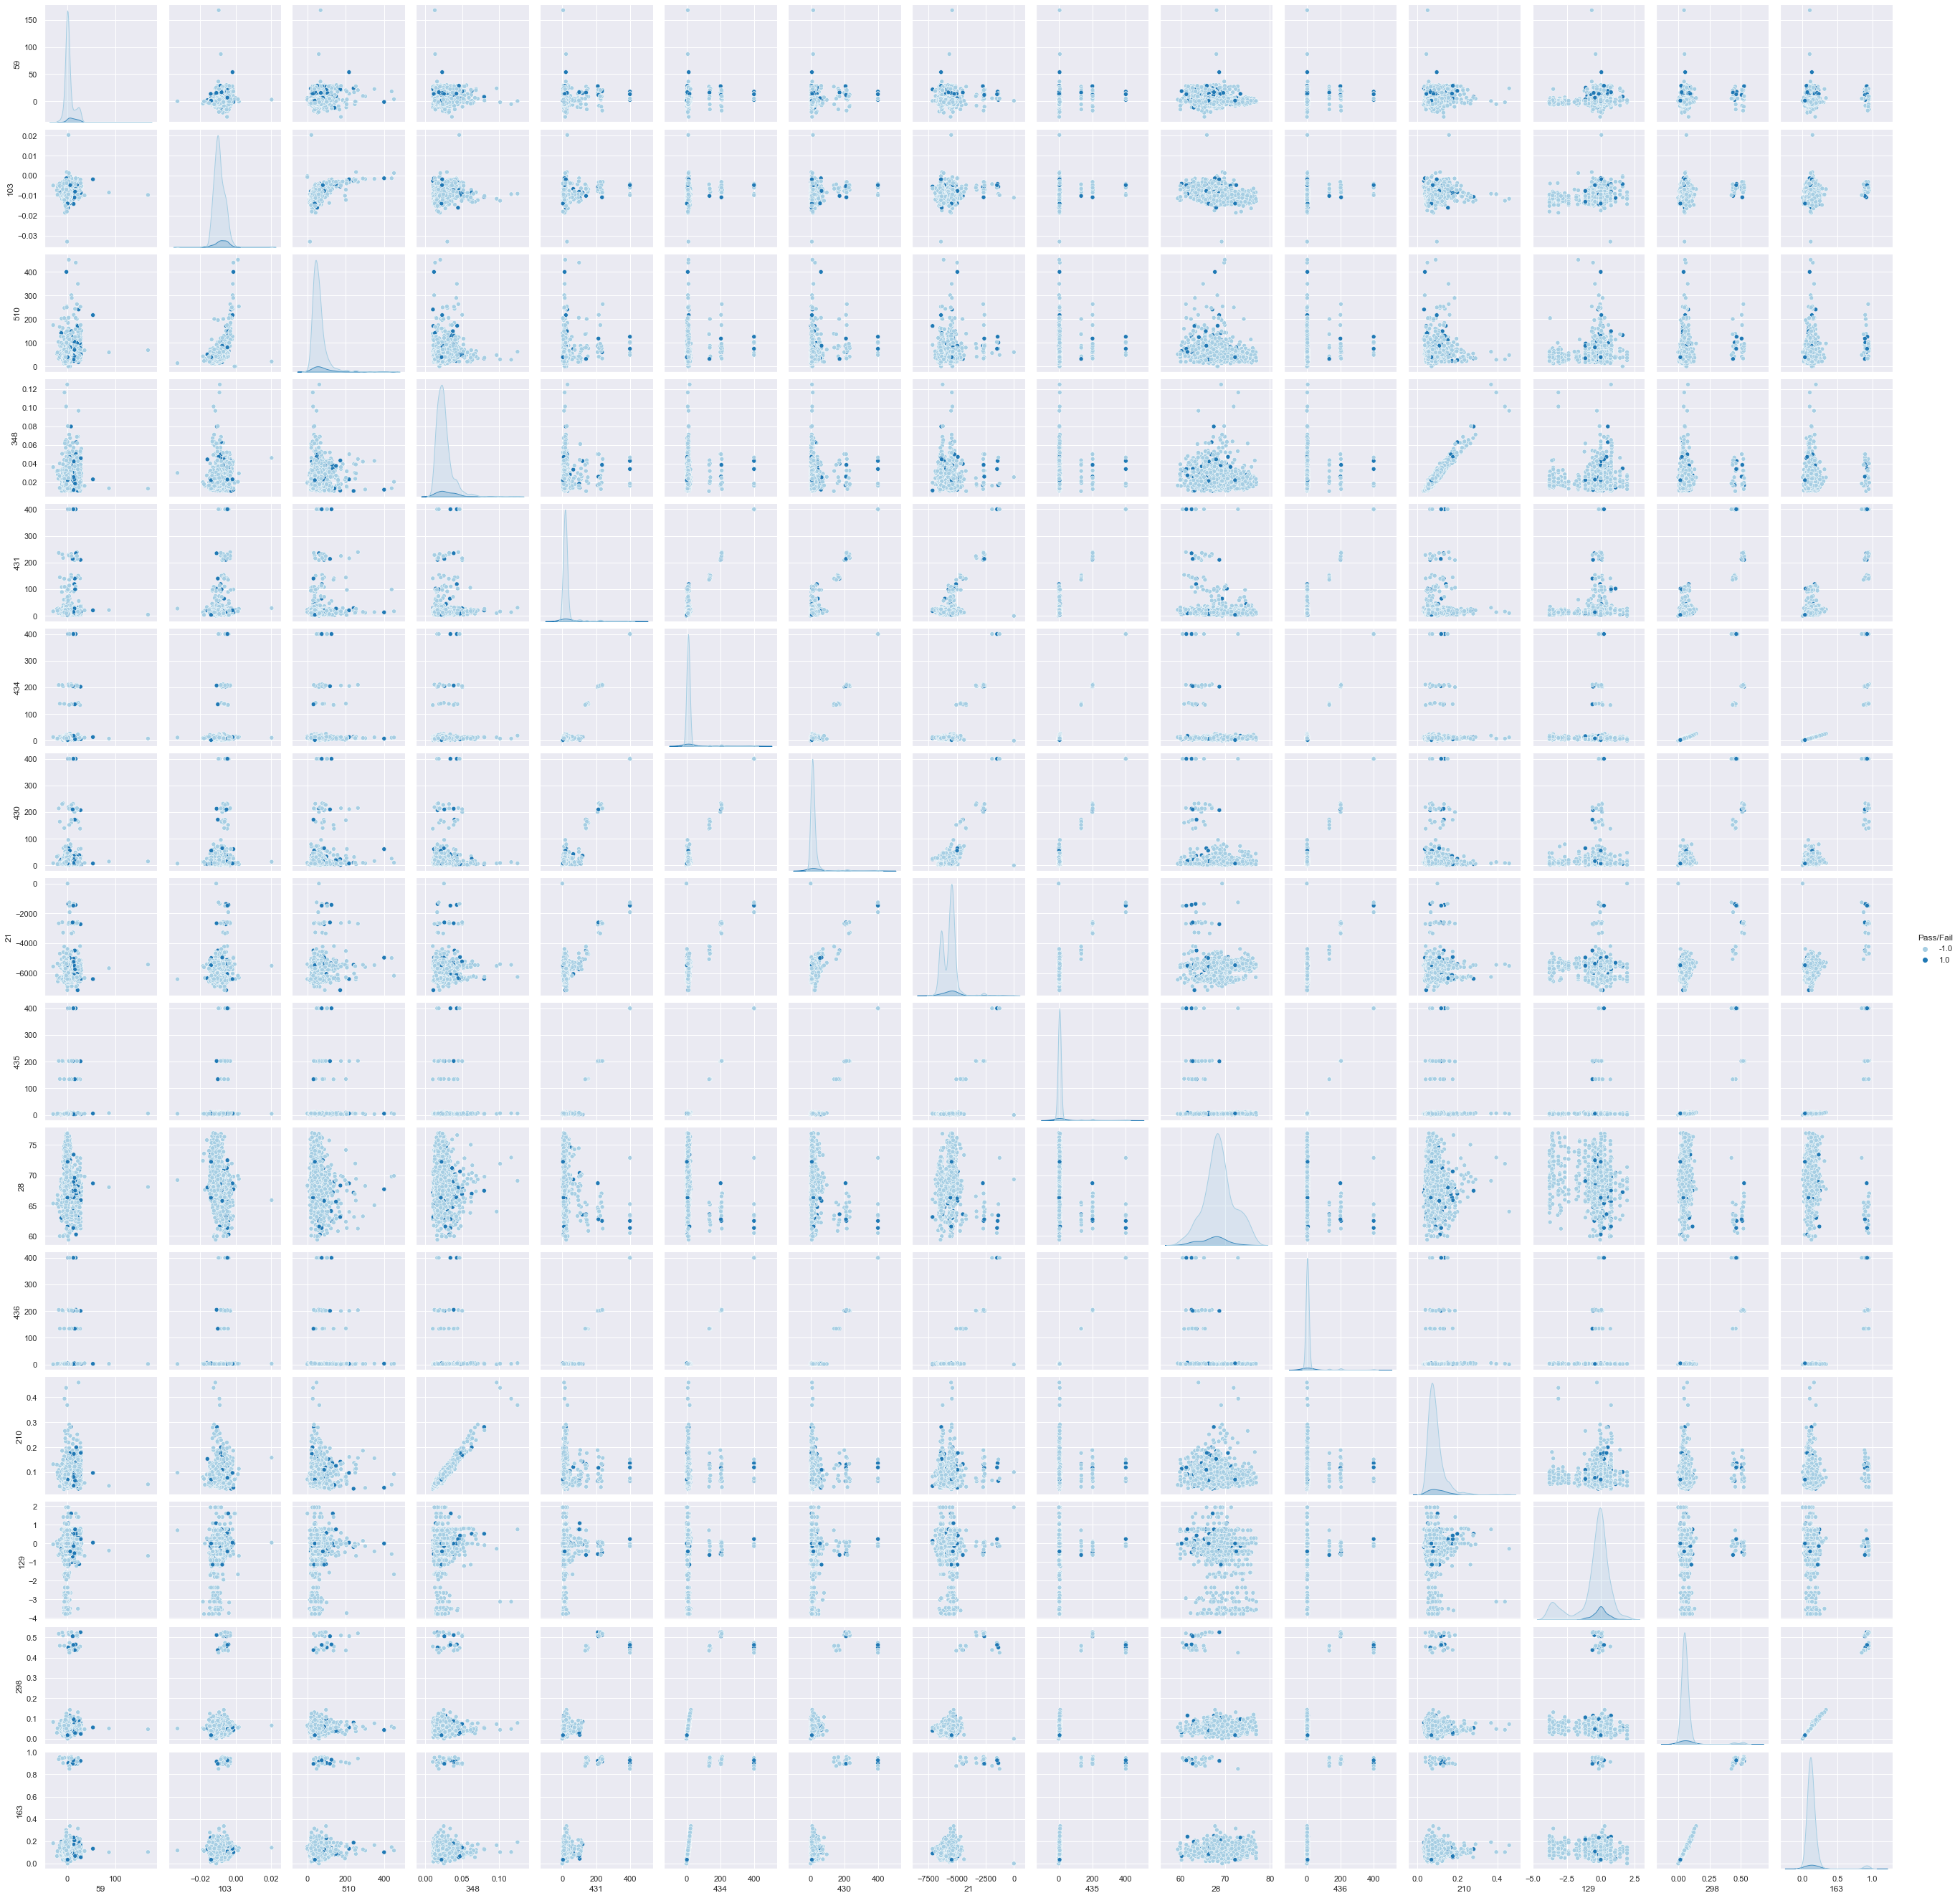

In [22]:
sns.pairplot(df2, hue='Pass/Fail' , diag_kind = 'kde', palette="Paired")

### Observation
- From the scatter plots it can be understood that there are no postive or negative trends, which means the variables are less dependent on each other. 
- Most of the attributes are either left or right skewed

In [23]:
five_point=df2.describe().T
five_point[['min','25%','50%','75%','max']]

,min,25%,50%,75%,max
59,-28.9882,-0.98045,1.7991,6.34000,168.1455
103,-0.0329,-0.01120,-0.0095,-0.00715,0.0203
510,0.0000,37.31615,51.2418,68.82720,451.4851
348,0.0103,0.01820,0.0232,0.02890,0.1251
431,0.0000,12.24740,17.5311,22.41550,400.0000
434,0.0000,7.80065,10.3414,12.82455,400.0000
430,0.0000,6.65890,10.2500,17.08940,400.0000
21,-7150.2500,-6279.25000,-5563.5000,-5397.37500,0.0000
435,0.0000,3.56125,4.5015,5.59565,400.0000
28,59.4000,66.64445,68.3444,70.32775,76.9667


In [24]:
df2.dtypes

59           float64
103          float64
510          float64
348          float64
431          float64
434          float64
430          float64
21           float64
435          float64
28           float64
436          float64
210          float64
129          float64
298          float64
163          float64
Pass/Fail    float64
dtype: object

In [25]:
df2.nunique()

59           1035
103           142
510          1034
348           337
431          1056
434          1048
430          1057
21            933
435          1039
28            688
436          1053
210           687
129            67
298           578
163           237
Pass/Fail       2
dtype: int64

#### Most of the attributes are continuous where as the target variable is binary

<AxesSubplot:xlabel='Pass/Fail', ylabel='count'>

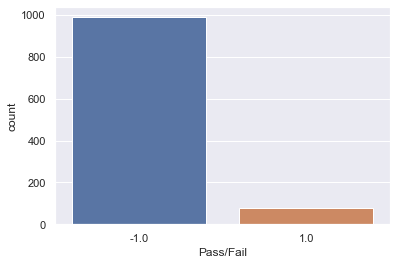

In [26]:
sns.countplot(x='Pass/Fail',data=df2)

#### From the plot, it can be understood that there is an imbalance in the dataset

#### Upsampling the dataset using SMOTE

In [27]:
#!pip install imblearn


In [28]:
from imblearn.over_sampling import SMOTE

In [29]:
df2[~df2.applymap(np.isreal).all(1)]

,59,103,510,348,431,434,430,21,435,28,436,210,129,298,163,Pass/Fail


In [30]:
df2.groupby(["Pass/Fail"]).count()

,59,103,510,348,431,434,430,21,435,28,436,210,129,298,163
Pass/Fail,,,,,,,,,,,,,,,
-1.0,989,989,989,989,989,989,989,989,989,989,989,989,989,989,989
1.0,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78


In [31]:
x=df2.copy(deep=True)
x.drop(['Pass/Fail'],axis=1,inplace=True)
y=df2[['Pass/Fail']]

In [32]:
print('No of rows in the data:', x.shape[0])
print('No of columns in the data:', x.shape[1])
print('No of rows in the data:', y.shape[0])
print('No of columns in the data:', y.shape[1])

No of rows in the data: 1067
No of columns in the data: 15
No of rows in the data: 1067
No of columns in the data: 1


In [33]:
x=x.to_numpy()
y=y.to_numpy()


type(x)

numpy.ndarray

In [34]:
print("Before UpSampling, counts of label '1': {}".format(sum(y==1)))
print("Before UpSampling, counts of label '-1': {} \n".format(sum(y==-1)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
x, y = sm.fit_sample(x, y.ravel())


print("After UpSampling, counts of label '1': {}".format(sum(y==1)))
print("After UpSampling, counts of label '-1': {} \n".format(sum(y==-1)))



print('After UpSampling, the shape of train_X: {}'.format(x.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y.shape))








Before UpSampling, counts of label '1': [78]
Before UpSampling, counts of label '-1': [989] 

After UpSampling, counts of label '1': 989
After UpSampling, counts of label '-1': 989 

After UpSampling, the shape of train_X: (1978, 15)
After UpSampling, the shape of train_y: (1978,) 



In [35]:
print('x  data {}'.format(x.shape))
print('y  data {}'.format(y.shape))


x  data (1978, 15)
y  data (1978,)


In [36]:
X_df=pd.DataFrame(x, columns = ['59','103','510','348','431','434','430','21','435','28','436','210','129','298','163'])


In [37]:

five_point=X_df.describe().T
five_point[['min','25%','50%','75%','max']]

,min,25%,50%,75%,max
59,-28.9882,0.953625,5.359463,14.386367,168.1455
103,-0.0329,-0.010700,-0.008800,-0.006522,0.0203
510,0.0000,41.352663,56.694550,75.533303,451.4851
348,0.0103,0.019500,0.024800,0.032500,0.1251
431,0.0000,13.806500,18.424470,23.387650,400.0000
434,0.0000,8.162069,10.973852,13.457366,400.0000
430,0.0000,7.222973,11.439614,18.410898,400.0000
21,-7150.2500,-6107.988516,-5513.743778,-5336.812500,0.0000
435,0.0000,3.731640,4.620702,5.557075,400.0000
28,59.4000,66.257183,67.953894,69.525326,76.9667


In [38]:
five_point=df2.describe().T
five_point[['min','25%','50%','75%','max']]

,min,25%,50%,75%,max
59,-28.9882,-0.98045,1.7991,6.34000,168.1455
103,-0.0329,-0.01120,-0.0095,-0.00715,0.0203
510,0.0000,37.31615,51.2418,68.82720,451.4851
348,0.0103,0.01820,0.0232,0.02890,0.1251
431,0.0000,12.24740,17.5311,22.41550,400.0000
434,0.0000,7.80065,10.3414,12.82455,400.0000
430,0.0000,6.65890,10.2500,17.08940,400.0000
21,-7150.2500,-6279.25000,-5563.5000,-5397.37500,0.0000
435,0.0000,3.56125,4.5015,5.59565,400.0000
28,59.4000,66.64445,68.3444,70.32775,76.9667


#### From comparing the Five point summary of the train data and original data, we can see that they are entirely different after upsampling 

### Using KNN for the classification problem

### Without Cross Validation

### Standardising the data

In [39]:
x=X_df.apply(zscore)

In [40]:
X_train_res, X_test, y_train_res, y_test = train_test_split(x, y, test_size=0.30, random_state=5)


In [41]:
knn=KNeighborsClassifier()
knn.fit(X_train_res,y_train_res)

KNeighborsClassifier()

Accurancy : 0.8535353535353535
KNN TRAIN score :  0.8880057803468208
KNN TEST score :  0.8535353535353535

[[217  83]
 [  4 290]]

 True Possitive   =  290
True Negative     =  217
False Possive     =  83
False Negative    =  4


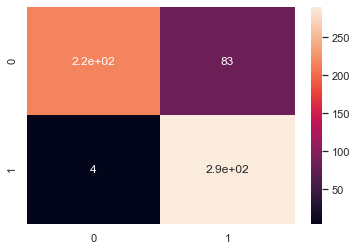

AUC score: 0.9285600907029479


In [42]:
y_pred=knn.predict(X_test)
y_proba=knn.predict_proba(X_test)

print('Accurancy :',accuracy_score(y_test, y_pred))
print("KNN TRAIN score : ",format(knn.score(X_train_res, y_train_res)))
print("KNN TEST score : ",format(knn.score(X_test, y_test)))
print()

cm=metrics.confusion_matrix(y_test, y_pred)
print(cm)

print('\n True Possitive   = ',cm[1][1])
print('True Negative     = ',cm[0][0])
print('False Possive     = ',cm[0][1])
print('False Negative    = ',cm[1][0])
sns.heatmap(cm,annot=True)
plt.show()



false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

print('AUC score:', roc_auc)

In [43]:
print('\nLogistic Regression Report : \n',metrics.classification_report(y_test,y_pred))
conf_table = cm
a = (conf_table[0,0] + conf_table[1,1]) / (conf_table[0,0] + conf_table[0,1] + conf_table[1,0] + conf_table[1,1])
p = conf_table[1,1] / (conf_table[1,1] + conf_table[0,1])
r = conf_table[1,1] / (conf_table[1,1] + conf_table[1,0])
f = (2 * p * r) / (p + r)
print("Accuracy   : ",round(a,2))
print("precision : ",round(p,2))
print("recall     : ",round(r,2))
print("F1 score   : ",round(f,2))


Logistic Regression Report : 
               precision    recall  f1-score   support

        -1.0       0.98      0.72      0.83       300
         1.0       0.78      0.99      0.87       294

    accuracy                           0.85       594
   macro avg       0.88      0.85      0.85       594
weighted avg       0.88      0.85      0.85       594

Accuracy   :  0.85
precision :  0.78
recall     :  0.99
F1 score   :  0.87


#### The accuracy is around 85%, using cross validation might improve the score

### With cross validation

In [44]:
num_folds = 60
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
model = KNeighborsClassifier()
results = cross_val_score(model, x,y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

J:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[0.66666667 0.66666667 0.39393939 0.33333333 0.39393939 0.48484848
 0.54545455 0.54545455 0.54545455 0.54545455 0.63636364 0.57575758
 0.66666667 0.72727273 0.78787879 0.72727273 0.81818182 0.72727273
 0.84848485 0.96969697 0.90909091 0.75757576 0.81818182 0.66666667
 0.81818182 0.75757576 0.84848485 0.93939394 1.         1.
 0.96969697 0.81818182 0.96969697 1.         1.         1.
 0.96969697 1.         1.         1.         0.96969697 1.
 0.93939394 0.96969697 0.96969697 1.         1.         1.
 0.96969697 0.93939394 0.96969697 1.         0.96969697 1.
 1.         1.         0.96969697 1.         1.         1.        ]
Accuracy: 84.192% (18.803%)


#### Using cross 

#### Using GridsearchCV to find best parameters

In [45]:
param_grid = {'n_neighbors': list(range(1,9)),
             'algorithm': ('auto', 'ball_tree', 'kd_tree' , 'brute') }

In [46]:
gs = GridSearchCV(knn,param_grid,cv=10)

In [47]:
gs.fit(X_train_res, y_train_res)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]})

In [48]:
gs.cv_results_['params']

[{'algorithm': 'auto', 'n_neighbors': 1},
 {'algorithm': 'auto', 'n_neighbors': 2},
 {'algorithm': 'auto', 'n_neighbors': 3},
 {'algorithm': 'auto', 'n_neighbors': 4},
 {'algorithm': 'auto', 'n_neighbors': 5},
 {'algorithm': 'auto', 'n_neighbors': 6},
 {'algorithm': 'auto', 'n_neighbors': 7},
 {'algorithm': 'auto', 'n_neighbors': 8},
 {'algorithm': 'ball_tree', 'n_neighbors': 1},
 {'algorithm': 'ball_tree', 'n_neighbors': 2},
 {'algorithm': 'ball_tree', 'n_neighbors': 3},
 {'algorithm': 'ball_tree', 'n_neighbors': 4},
 {'algorithm': 'ball_tree', 'n_neighbors': 5},
 {'algorithm': 'ball_tree', 'n_neighbors': 6},
 {'algorithm': 'ball_tree', 'n_neighbors': 7},
 {'algorithm': 'ball_tree', 'n_neighbors': 8},
 {'algorithm': 'kd_tree', 'n_neighbors': 1},
 {'algorithm': 'kd_tree', 'n_neighbors': 2},
 {'algorithm': 'kd_tree', 'n_neighbors': 3},
 {'algorithm': 'kd_tree', 'n_neighbors': 4},
 {'algorithm': 'kd_tree', 'n_neighbors': 5},
 {'algorithm': 'kd_tree', 'n_neighbors': 6},
 {'algorithm': 'kd

In [49]:
gs.best_params_

{'algorithm': 'auto', 'n_neighbors': 2}

#### So the best parameters to use for KNN are auto for algorithm and 2 for n_neighbors

In [50]:
gs.cv_results_['mean_test_score']

array([0.87717131, 0.88802002, 0.85692837, 0.87138463, 0.84028256,
       0.85617767, 0.83161297, 0.84387968, 0.87717131, 0.88802002,
       0.85692837, 0.87138463, 0.84028256, 0.85617767, 0.83161297,
       0.84387968, 0.87717131, 0.88802002, 0.85692837, 0.87138463,
       0.84028256, 0.85617767, 0.83161297, 0.84387968, 0.87717131,
       0.88802002, 0.85692837, 0.87138463, 0.84028256, 0.85617767,
       0.83161297, 0.84387968])

In [51]:
print(" Best cross-validation accuracy: {:.2f}". format( gs.best_score_))

 Best cross-validation accuracy: 0.89


In [52]:
print(" Test set accuracy: {:.2f}". format( gs.score(X_test, y_test)))

 Test set accuracy: 0.91


### Using PCA

In [53]:
df.isnull().sum()

0            0
1            0
2            0
3            0
4            0
5            0
6            0
7            0
8            0
9            0
10           0
11           0
12           0
13           0
14           0
15           0
16           0
17           0
18           0
19           0
20           0
21           0
22           0
23           0
24           0
25           0
26           0
27           0
28           0
29           0
            ..
561          0
562          0
563          0
564          0
565          0
566          0
567          0
568          0
569          0
570          0
571          0
572          0
573          0
574          0
575          0
576          0
577          0
578          0
579          0
580          0
581          0
582          0
583          0
584          0
585          0
586          0
587          0
588          0
589          0
Pass/Fail    0
Length: 591, dtype: int64

In [54]:
x=df[['59','103','510','348','431','434','430','21','435','28','436','210','129','298','163']]
y=df[['Pass/Fail']]

In [55]:
x.columns

Index(['59', '103', '510', '348', '431', '434', '430', '21', '435', '28',
       '436', '210', '129', '298', '163'],
      dtype='object')

In [56]:
x=x.apply(zscore)

In [57]:
covMatrix = np.cov(x,rowvar=False)

In [58]:
pca = PCA(n_components=15)
pca.fit(x)

PCA(n_components=15)

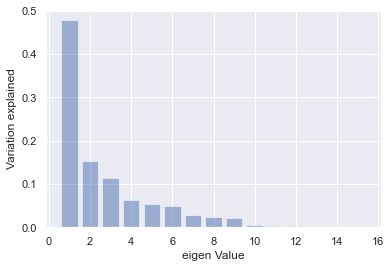

In [59]:
plt.bar(list(range(1,16)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

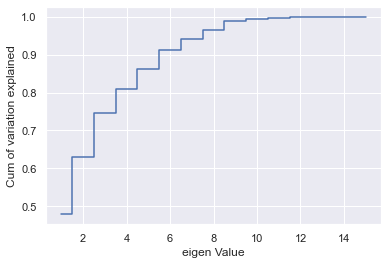

In [60]:
plt.step(list(range(1,16)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [61]:
pca3 = PCA(n_components=9)
pca3.fit(x)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
xpca = pca3.transform(x)

[[ 3.96034405e-02  7.97198283e-02  6.97581427e-02  3.02245796e-02
   3.53280358e-01  3.66802494e-01  3.59857420e-01  2.79354961e-01
   3.65877748e-01 -9.27949958e-02  3.65560989e-01  2.59563253e-02
   2.64410186e-02  3.49122306e-01  3.46464194e-01]
 [ 3.16643842e-01  4.05120640e-01  3.17569722e-01  4.79376147e-01
  -2.79297113e-02 -4.03863615e-02 -4.86766950e-02 -1.05423755e-01
  -4.08866899e-02 -2.83672671e-01 -4.14688824e-02  4.62713689e-01
   2.97192263e-01 -3.58118183e-02 -3.86775090e-02]
 [-1.64899866e-01 -3.99768481e-01 -4.00962217e-01  5.07673259e-01
   1.18943244e-02  2.58551691e-02  1.33461571e-02  6.05063716e-02
   2.58188234e-02  2.59044294e-01  2.55270708e-02  5.28054570e-01
  -2.04730141e-01  1.63777106e-02  1.98689452e-02]
 [-2.87277734e-01  3.03741610e-01  5.51556595e-01  7.38654283e-02
  -6.74174080e-02 -3.61592801e-02 -1.36748363e-02  1.71135485e-01
  -3.39588690e-02  3.11826459e-01 -3.96718558e-02  8.49839291e-02
  -6.10392209e-01  1.52660039e-02  1.47659654e-02]
 [ 8

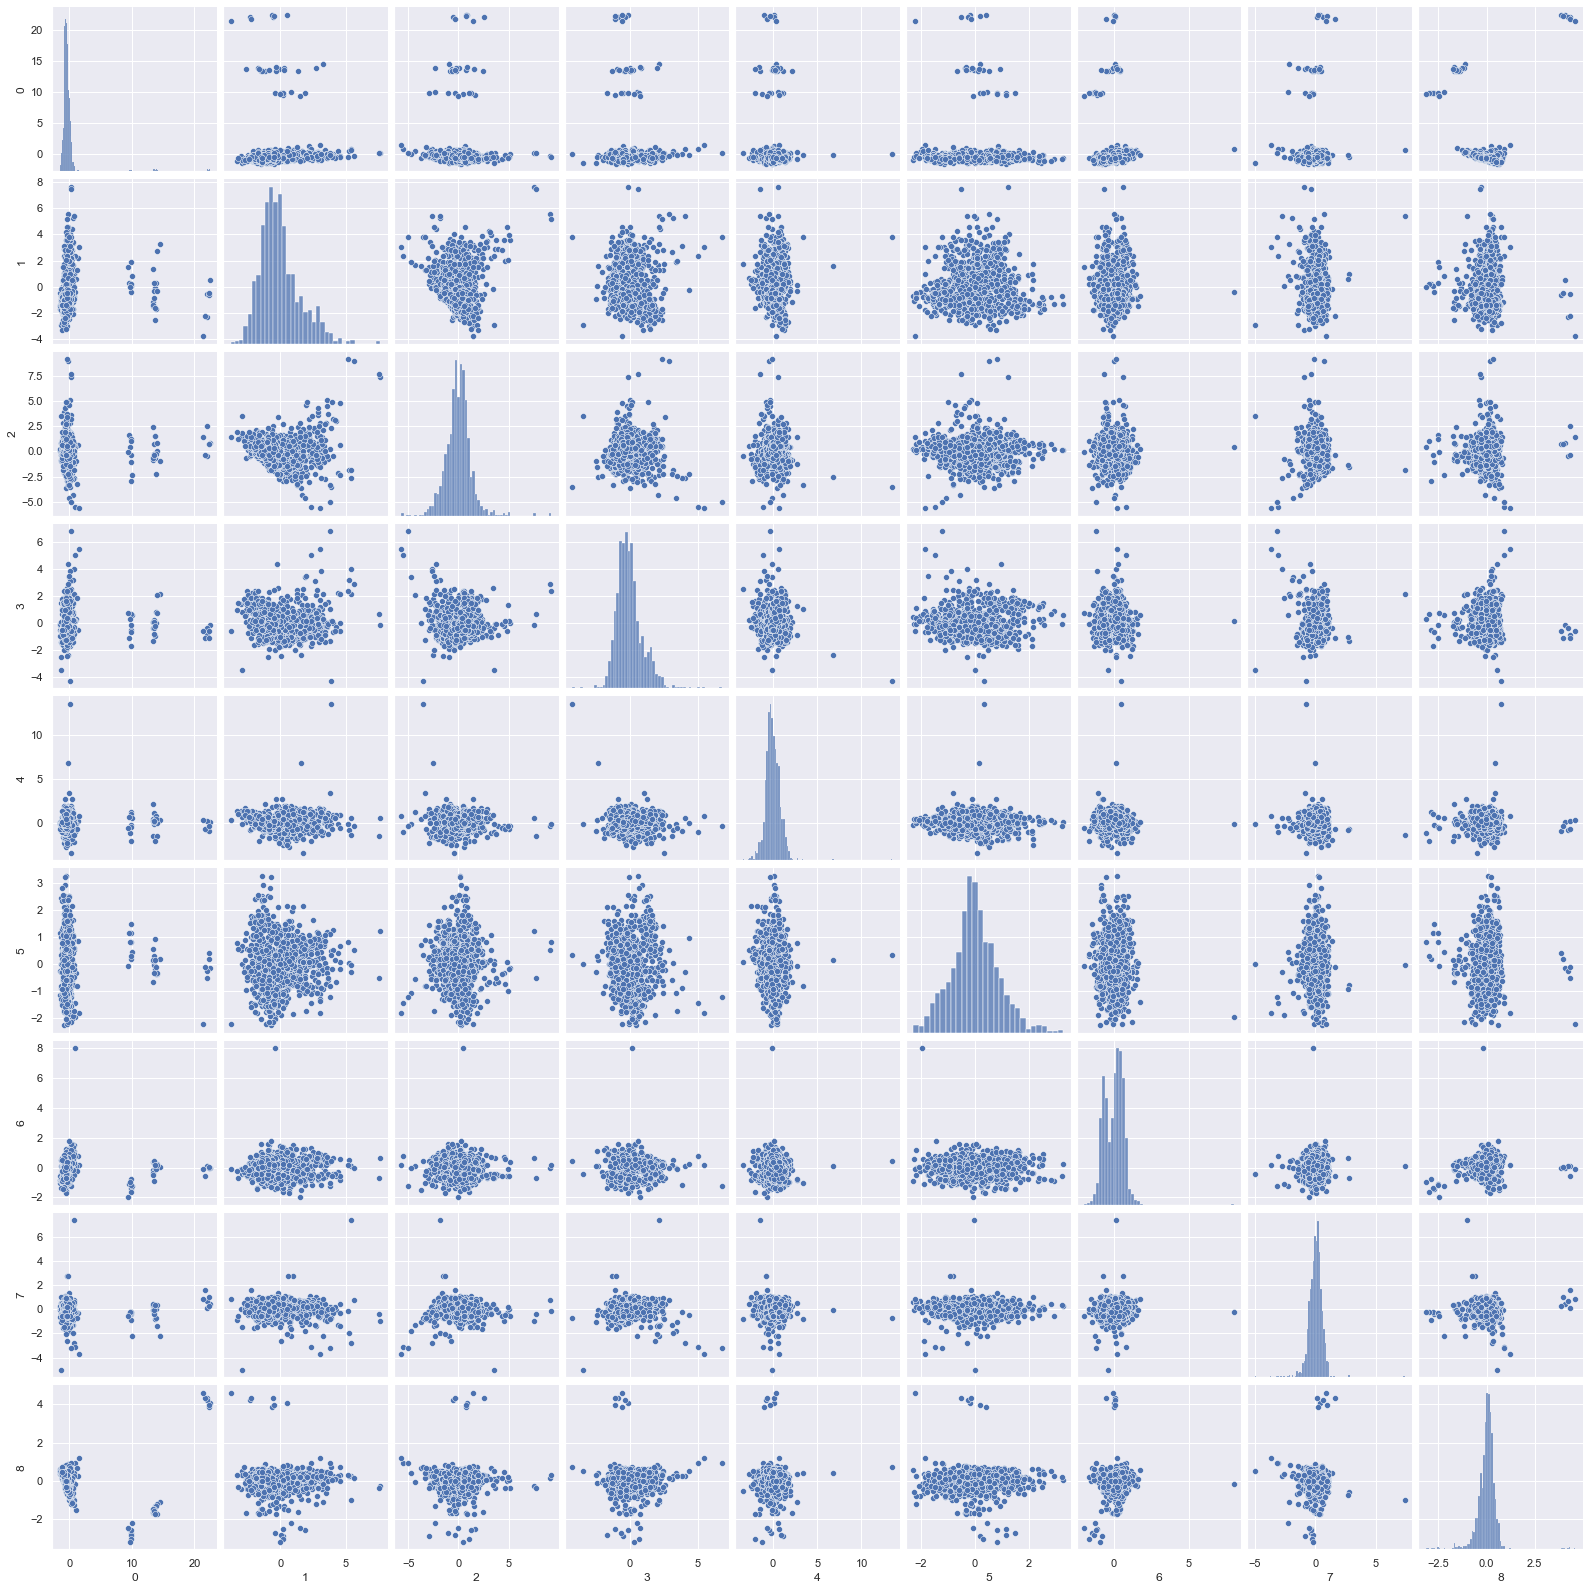

In [62]:
sns.pairplot(pd.DataFrame(xpca))

In [63]:

y=y.to_numpy()


type(xpca)

numpy.ndarray

In [64]:
print("Before UpSampling, counts of label '1': {}".format(sum(y==1)))
print("Before UpSampling, counts of label '-1': {} \n".format(sum(y==-1)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_res, y_train_res = sm.fit_sample(xpca, y.ravel())


print("After UpSampling, counts of label '1': {}".format(sum(y==1)))
print("After UpSampling, counts of label '-1': {} \n".format(sum(y==-1)))



print('After UpSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res.shape))




Before UpSampling, counts of label '1': [78]
Before UpSampling, counts of label '-1': [989] 

After UpSampling, counts of label '1': [78]
After UpSampling, counts of label '-1': [989] 

After UpSampling, the shape of train_X: (1978, 9)
After UpSampling, the shape of train_y: (1978,) 



In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.30, random_state=5)

In [66]:
num_folds = 60
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
model = KNeighborsClassifier()
results = cross_val_score(model, X_train_res,y_train_res, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

J:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[0.75757576 0.63636364 0.42424242 0.48484848 0.57575758 0.45454545
 0.60606061 0.63636364 0.63636364 0.54545455 0.6969697  0.66666667
 0.72727273 0.81818182 0.78787879 0.87878788 0.90909091 0.6969697
 0.84848485 0.96969697 0.90909091 0.78787879 0.81818182 0.72727273
 0.84848485 0.81818182 0.72727273 0.90909091 1.         1.
 0.96969697 0.90909091 0.96969697 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.96969697 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]
Accuracy: 86.869% (16.641%)


In [67]:
param_grid = {'n_neighbors': list(range(1,9)),
             'algorithm': ('auto', 'ball_tree', 'kd_tree' , 'brute') }
gs = GridSearchCV(knn,param_grid,cv=10)

 

gs.fit( X_train, y_train) 

print(" Best cross-validation accuracy: {:.2f}". format( gs.best_score_)) 
print(" Best parameters: ", gs.best_params_) 
print(" Test set accuracy: {:.2f}". format( gs.score( X_test, y_test)))


 Best cross-validation accuracy: 0.92
 Best parameters:  {'algorithm': 'auto', 'n_neighbors': 2}
 Test set accuracy: 0.92


### Testing the algorithm with test data (df3 - dataframe)

In [68]:
x=df3.copy(deep=True)
x.drop(['Pass/Fail'],axis=1,inplace=True)
x=x[['59','103','510','348','431','434','430','21','435','28','436','210','129','298','163']]
y=df3[['Pass/Fail']]

In [69]:
print('No of rows in the data:', x.shape[0])
print('No of columns in the data:', x.shape[1])
print('No of rows in the data:', y.shape[0])
print('No of columns in the data:', y.shape[1])

No of rows in the data: 500
No of columns in the data: 15
No of rows in the data: 500
No of columns in the data: 1


In [70]:
num_folds = 60
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
model = KNeighborsClassifier(algorithm='auto',n_neighbors=2)
results = cross_val_score(model, x,y, cv=kfold)


J:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
J:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
J:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
J:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

In [71]:
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[1.         1.         1.         1.         1.         1.
 0.88888889 1.         0.88888889 0.88888889 1.         1.
 1.         0.77777778 1.         1.         0.88888889 0.88888889
 1.         0.66666667 0.875      1.         1.         1.
 1.         0.875      0.875      0.875      1.         0.75
 0.625      0.875      0.875      1.         0.625      1.
 1.         1.         1.         0.875      1.         1.
 1.         0.875      0.875      1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.875      1.         1.         1.         1.         1.        ]
Accuracy: 94.398% (9.433%)


## Observation Report

- Training accuracy without Cross valdiation on train data : 88%
- Valdiation accuracy without Cross valdiation on train data: 85%
- Accuracy using Cross valdiation: 84%
- Best parameters using Gridsearch before applying PCA :
    - 'algorithm': 'auto', 
    - 'n_neighbors': 2
    - Train score: 89%,
    - Test score: 91%
- After using PCA, accuracy using cross valdiation : 86%
- The best parameters even after applying PCA still remains the same
- Gridsearch accuracy for both train and valdation data : 92%
- Cross validation score on test/production data using the best parameters : 94%

## Testing the KNN algorithm with best parameters on Future data

In [72]:
df=pd.read_excel('Future_predictions.xlsx')

In [73]:
df.head()

,Time,0,1,2,3,4,5,6,7,8,...,580,581,582,583,584,585,586,587,588,589
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100,97.6133,0.1242,1.5005,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100,102.3433,0.1247,1.4966,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100,95.4878,0.1241,1.4436,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100,104.2367,0.1217,1.4882,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100,100.3967,0.1235,1.5031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [74]:
df.drop('Time',axis=1,inplace= True)

In [75]:
print('The size of the data:', df.size)
print('No of rows in the data:', df.shape[0])
print('No of columns in the data:', df.shape[1])

The size of the data: 10620
No of rows in the data: 18
No of columns in the data: 590


In [76]:
df.columns[df.isna().any()].tolist()

[72,
 73,
 85,
 109,
 110,
 111,
 112,
 157,
 158,
 220,
 244,
 245,
 246,
 247,
 292,
 293,
 345,
 346,
 358,
 382,
 383,
 384,
 385,
 492,
 516,
 517,
 518,
 519,
 546,
 547,
 548,
 549,
 550,
 551,
 552,
 553,
 554,
 555,
 556,
 557,
 562,
 563,
 564,
 565,
 566,
 567,
 568,
 569,
 578,
 579,
 580,
 581,
 586,
 587,
 588,
 589]

In [77]:
df = df.convert_objects(convert_numeric=True)

J:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [78]:
medianFiller = lambda x: x.fillna(x.median())

df = df.apply(medianFiller,axis=0).astype(float)

In [79]:

df.columns[df.isna().any()].tolist()

[85,
 109,
 110,
 111,
 157,
 158,
 220,
 244,
 245,
 246,
 292,
 293,
 358,
 382,
 383,
 384,
 492,
 516,
 517,
 518]

In [80]:
df = df.apply (pd.to_numeric, errors='coerce')
df = df.dropna(axis=1)

In [81]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.0060,82.8602,0.5005,0.0118,0.0035,2.3630,0.0202,0.0151,0.0052,82.0989
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.0060,82.8602,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [82]:
df2=df.copy(deep=True)

In [83]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.0060,82.8602,0.5005,0.0118,0.0035,2.3630,0.0202,0.0151,0.0052,82.0989
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.0060,82.8602,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [84]:
df2=df2[[59,103,510,348,431,434,430,21,435,28,436,210,129,298,163]]

In [85]:
five_point=df2.describe().T
five_point[['min','25%','50%','75%','max']]

,min,25%,50%,75%,max
59,-12.2945,-0.692700,21.52180,26.505225,29.1309
103,-0.0075,-0.005900,-0.00500,-0.004275,-0.0026
510,55.0265,71.331550,92.27925,140.723050,263.4538
348,0.0103,0.015850,0.02155,0.035675,0.0473
431,2.2655,12.087200,23.27950,32.569225,400.0000
434,3.4289,8.093875,9.24690,13.718600,400.0000
430,4.3184,13.500375,24.10970,39.458775,400.0000
21,-6154.0000,-5721.062500,-5458.00000,-5367.000000,-1431.5000
435,1.5699,2.357525,3.22780,6.795050,400.0000
28,60.2444,62.575000,63.36670,67.108300,68.7111


In [86]:
df2=df2.apply(zscore)

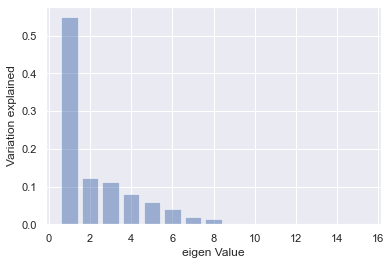

In [87]:
covMatrix = np.cov(df2,rowvar=False)

pca = PCA(n_components=15)
pca.fit(df2)

plt.bar(list(range(1,16)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

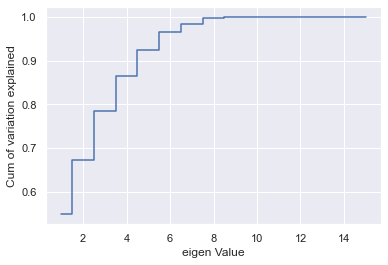

In [88]:
plt.step(list(range(1,16)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [89]:
pca3 = PCA(n_components=9)
pca3.fit(df2)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
xpca = pca3.transform(df2)


[[ 0.10916858  0.14172388  0.13462163  0.12761044  0.34489975  0.34310301
   0.34110683  0.3385419   0.34274596 -0.0430308   0.34267647  0.13471196
   0.01115819  0.32344817  0.3260445 ]
 [-0.04180909 -0.15236923 -0.27317549  0.65807267  0.00945984 -0.00394539
   0.03550628 -0.0529982  -0.0031625  -0.01342811 -0.0017797   0.64110249
   0.04265069 -0.15618652 -0.16049106]
 [ 0.46608042 -0.46735723 -0.42055999 -0.10301876  0.02098892  0.02955395
   0.01239473  0.0637189   0.03946684  0.34313257  0.03348141 -0.13915325
   0.47100112  0.06559032  0.07354338]
 [ 0.37653944  0.4837248   0.45939223  0.16176785 -0.07999533 -0.10986037
  -0.13937295 -0.04629935 -0.1142558   0.43003202 -0.12483771  0.16822413
   0.32335513  0.01213089  0.0202451 ]
 [-0.13752492  0.09494133 -0.2446023  -0.06541003  0.01653421  0.04052252
   0.03859904  0.05233385  0.03587823  0.76101293  0.03309763  0.03473462
  -0.56447308  0.01918382 -0.00961058]
 [ 0.72503381 -0.21066744  0.15514703  0.00617873 -0.01932654 -0.

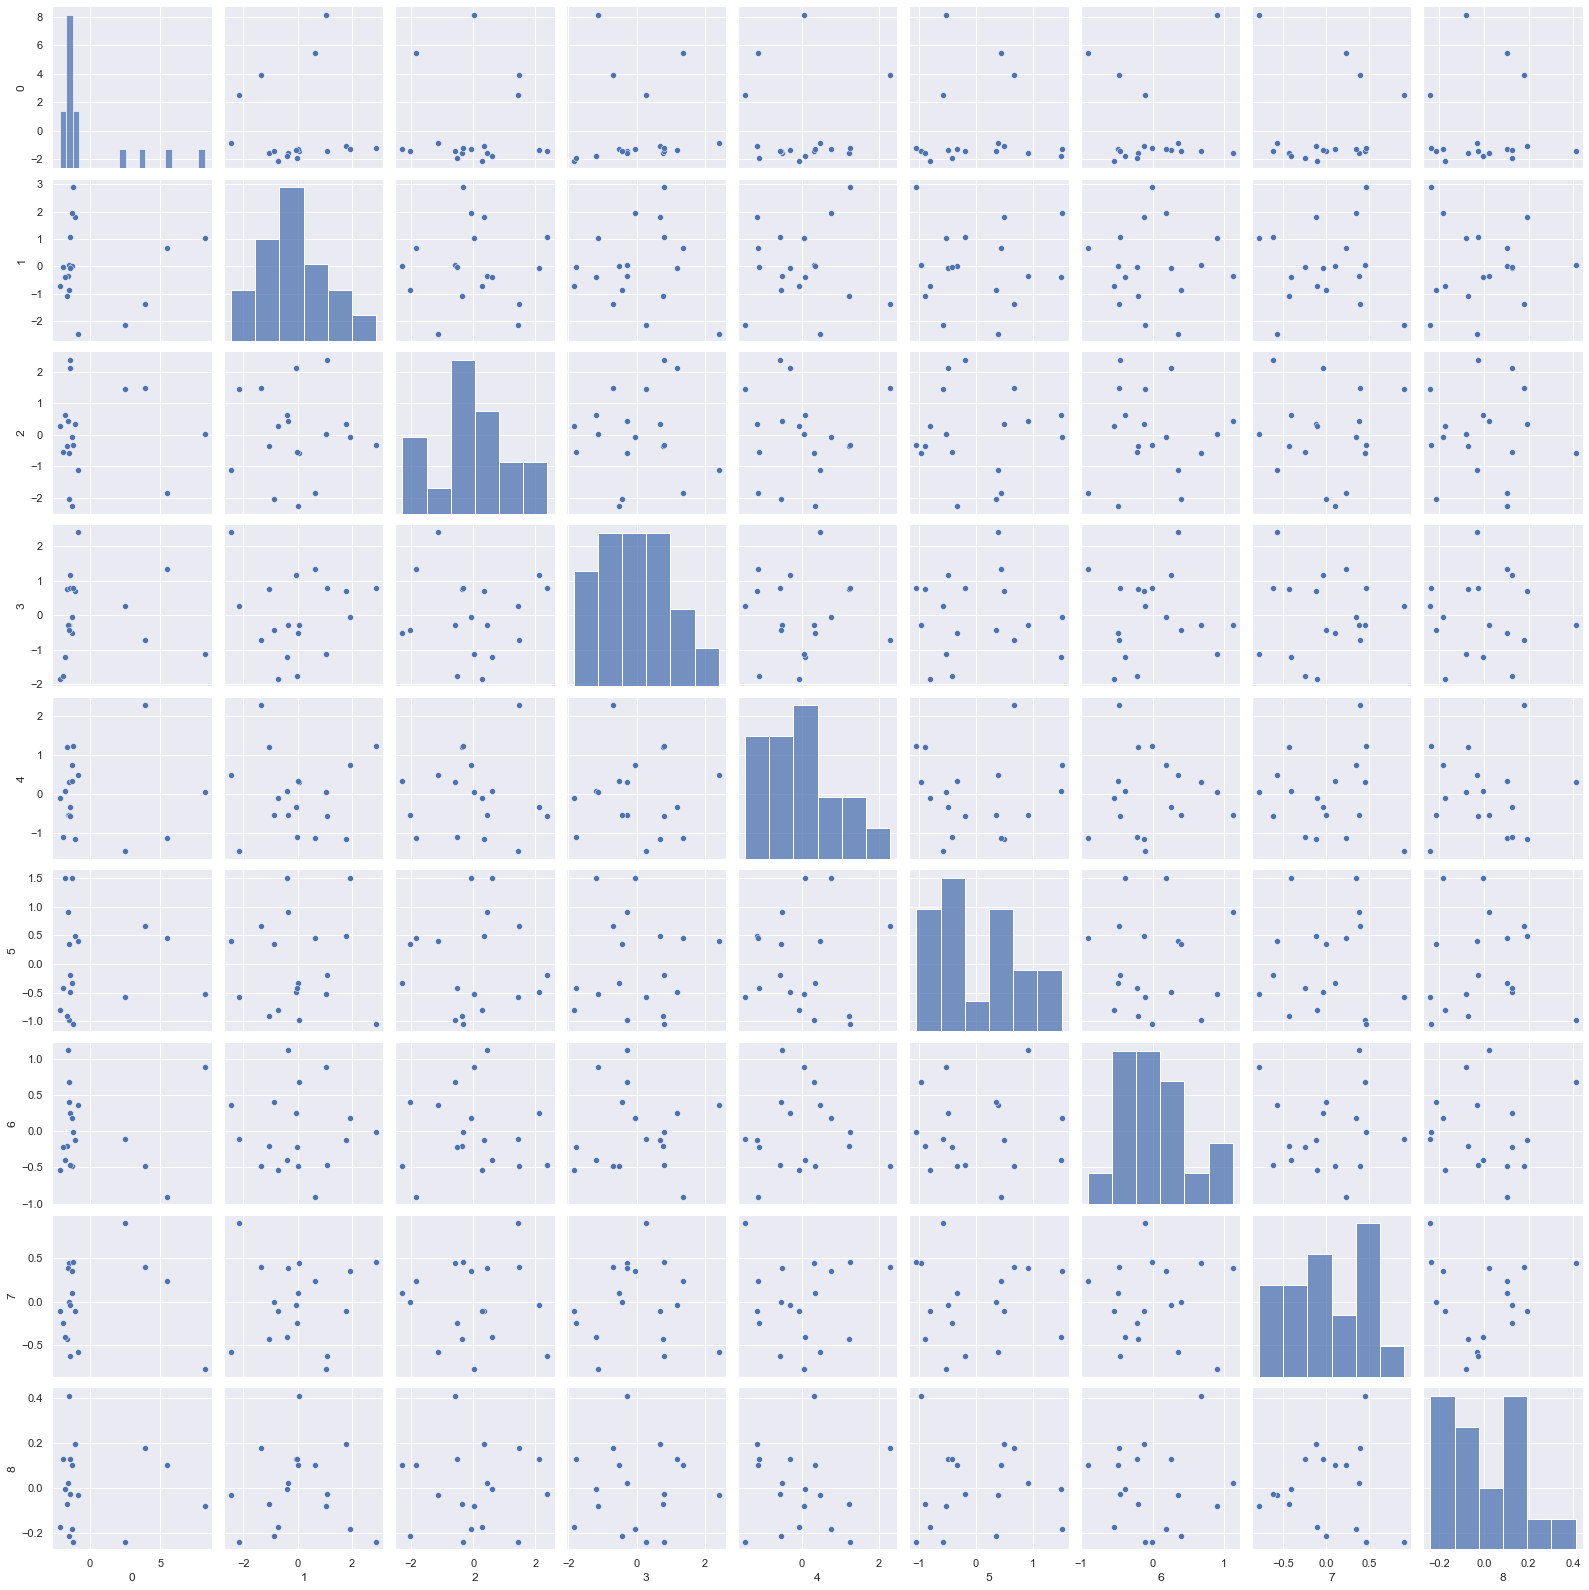

In [90]:
sns.pairplot(pd.DataFrame(xpca))

### KNN model with best parameters

In [91]:
knn=KNeighborsClassifier(algorithm='auto',n_neighbors=2)
knn.fit(X_train_res,y_train_res)

KNeighborsClassifier(n_neighbors=2)

### Predicting on Future data

In [92]:
knn.predict(xpca)

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1.,
       -1.,  1.,  1., -1., -1.])